In [12]:
# load Libraries

In [13]:
#basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# handle outliers librarie
import scipy.stats as stats

# data report librarie
from ydata_profiling import ProfileReport

#preporcessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#algo libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor , GradientBoostingRegressor , AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [14]:
train = pd.read_csv('training data.csv') # load training datset
train

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Malta,2008,Developed,80.0,64.0,0,7.14,2655.573684,86.0,1,...,72.0,8.15,72.0,0.1,21928.767000,49379.0,0.7,0.7,0.813,14.6
1,Congo,2005,Developing,55.3,394.0,8,2.03,0.000000,NaN,146,...,62.0,2.42,62.0,5.9,NaN,NaN,8.8,8.5,0.496,9.4
2,Burkina Faso,2009,Developing,56.9,283.0,44,4.55,81.143047,92.0,54118,...,91.0,7.41,92.0,1.1,552.745552,1514199.0,9.3,8.8,0.356,5.9
3,Guinea-Bissau,2011,Developing,57.1,289.0,4,3.57,40.453674,86.0,0,...,85.0,5.46,86.0,5.7,692.699890,1596154.0,7.8,7.7,0.410,9.0
4,Myanmar,2007,Developing,64.5,217.0,58,0.26,0.530573,85.0,1088,...,84.0,1.68,86.0,0.6,41.451000,49171586.0,13.2,13.5,0.484,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Malta,2011,Developed,87.0,59.0,0,6.91,3601.287457,82.0,3,...,96.0,9.60,96.0,0.1,22821.847000,416268.0,0.8,0.7,0.826,14.8
2052,Guinea-Bissau,2010,Developing,56.7,287.0,4,3.21,53.307827,83.0,26,...,82.0,6.70,83.0,5.9,543.957418,155588.0,8.0,7.9,0.405,8.9
2053,Haiti,2007,Developing,61.8,266.0,17,6.08,56.778587,NaN,0,...,62.0,5.56,63.0,2.7,615.819819,9556889.0,4.2,4.2,0.458,8.4
2054,Italy,2003,Developed,79.9,72.0,2,9.30,3519.258515,95.0,10982,...,97.0,8.17,96.0,0.1,27387.225800,5731323.0,0.5,0.5,0.841,15.4


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2056 non-null   object 
 1   Year                             2056 non-null   int64  
 2   Status                           2056 non-null   object 
 3   Life expectancy                  2050 non-null   float64
 4   Adult Mortality                  2050 non-null   float64
 5   infant deaths                    2056 non-null   int64  
 6   Alcohol                          1920 non-null   float64
 7   percentage expenditure           2056 non-null   float64
 8   Hepatitis B                      1686 non-null   float64
 9   Measles                          2056 non-null   int64  
 10   BMI                             2032 non-null   float64
 11  under-five deaths                2056 non-null   int64  
 12  Polio               

In [16]:
# Profile = ProfileReport(train)
# Profile.to_file('WHO_Prediction_report.html')  # full report of the training data

In [17]:
train.columns # all the columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [18]:
train.columns = train.columns.str.strip() # remove space on the columns name
train.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
drop_columns = [
    'Status','percentage expenditure','Total expenditure',
    'GDP','Population','thinness  1-19 years','thinness 5-9 years',
    'Income composition of resources', 'Schooling'
] # for drop the column

In [20]:
train.drop(columns=drop_columns, inplace=True) # drop columns we can not used in this projects.

In [21]:
train.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
0,Malta,2008,80.0,64.0,0,7.14,86.0,1,66.6,0,72.0,72.0,0.1
1,Congo,2005,55.3,394.0,8,2.03,NaN,146,21.7,13,62.0,62.0,5.9
2,Burkina Faso,2009,56.9,283.0,44,4.55,92.0,54118,16.1,77,91.0,92.0,1.1
3,Guinea-Bissau,2011,57.1,289.0,4,3.57,86.0,0,23.7,7,85.0,86.0,5.7
4,Myanmar,2007,64.5,217.0,58,0.26,85.0,1088,17.6,78,84.0,86.0,0.6


In [22]:
train.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
count,2056.000000,2050.000000,2050.000000,2056.000000,1920.000000,1686.000000,2056.000000,2032.000000,2056.000000,2045.000000,2045.000000,2056.000000
mean,2007.555447,69.395610,163.696585,28.689689,4.599500,81.137011,2296.159047,38.667421,39.991245,82.794132,82.577017,1.750924
std,4.617942,9.447094,123.075521,111.346455,4.065525,24.926234,11610.468056,20.084653,152.776076,23.348319,23.691192,5.184832
min,2000.000000,39.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.400000,0.000000,3.000000,2.000000,0.100000
25%,2004.000000,63.400000,74.000000,0.000000,0.827500,77.000000,0.000000,19.400000,0.000000,79.000000,79.000000,0.100000
50%,2008.000000,72.200000,144.000000,3.000000,3.745000,92.000000,17.000000,44.100000,4.000000,93.000000,93.000000,0.100000
75%,2012.000000,75.700000,226.000000,21.000000,7.712500,97.000000,383.750000,56.300000,26.000000,97.000000,97.000000,0.700000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,2500.000000,99.000000,99.000000,50.600000


In [23]:
train.isna().sum() # total sum of missing value in each columns

Country                0
Year                   0
Life expectancy        6
Adult Mortality        6
infant deaths          0
Alcohol              136
Hepatitis B          370
Measles                0
BMI                   24
under-five deaths      0
Polio                 11
Diphtheria            11
HIV/AIDS               0
dtype: int64

In [24]:
more_missing_val = ['Hepatitis B'] # 370 missing val in this column -> 17% missing value

for col in more_missing_val:
    print("Missing Value of {} : {} %".format(col,train[col].isna().mean()*100))

Missing Value of Hepatitis B : 17.996108949416342 %


In [25]:
train.drop(columns='Hepatitis B', inplace=True) # Hepatitis B having more missing val so we can drop the column.

In [26]:
train.isnull().sum()   

Country                0
Year                   0
Life expectancy        6
Adult Mortality        6
infant deaths          0
Alcohol              136
Measles                0
BMI                   24
under-five deaths      0
Polio                 11
Diphtheria            11
HIV/AIDS               0
dtype: int64

In [15]:
# fill the missing value using mean() method

train['Alcohol'] = train['Alcohol'].fillna(train['Alcohol'].mean())
train['Life expectancy'] = train['Life expectancy'].fillna(train['Life expectancy'].mean())
train['Diphtheria'] = train['Diphtheria'].fillna(train['Diphtheria'].mean())
train['Polio'] = train['Polio'].fillna(train['Polio'].mean())
train['Adult Mortality'] = train['Adult Mortality'].fillna(train['Adult Mortality'].mean())
train['BMI'] = train['BMI'].fillna(train['BMI'].mean())

In [16]:
train.isnull().sum()   

Country              0
Year                 0
Life expectancy      0
Adult Mortality      0
infant deaths        0
Alcohol              0
Measles              0
BMI                  0
under-five deaths    0
Polio                0
Diphtheria           0
HIV/AIDS             0
dtype: int64

In [17]:
# handle outliers
def handle_outliers(dataframe, columns):
    dataframe_copy = dataframe.copy()
    for column in columns:
        z_scores = np.abs(stats.zscore(dataframe_copy[column]))
        threshold = 3
        outliers_mask = z_scores > threshold
        median_value = dataframe_copy[column].median()
        dataframe_copy.loc[outliers_mask, column] = median_value
    
    return dataframe_copy

In [18]:
columns_to_handle_outliers = ['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Diphtheria',
       'HIV/AIDS'
]

In [19]:
df = handle_outliers(train, columns_to_handle_outliers) # use outlier function

In [20]:
df.head() # clean dataset

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
0,Malta,2008,80.0,64.0,0,7.14,1,66.6,0,72.0,72.0,0.1
1,Congo,2005,55.3,394.0,8,2.03,146,21.7,13,62.0,62.0,5.9
2,Burkina Faso,2009,56.9,283.0,44,4.55,17,16.1,77,91.0,92.0,1.1
3,Guinea-Bissau,2011,57.1,289.0,4,3.57,0,23.7,7,85.0,86.0,5.7
4,Myanmar,2007,64.5,217.0,58,0.26,1088,17.6,78,84.0,86.0,0.6


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Country'] = le.fit_transform(df['Country']) # contrty column to convert numeric so using label encoder

In [22]:
df

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
0,104,2008,80.0,64.0,0,7.14,1,66.6,0,72.0,72.0,0.1
1,37,2005,55.3,394.0,8,2.03,146,21.7,13,62.0,62.0,5.9
2,25,2009,56.9,283.0,44,4.55,17,16.1,77,91.0,92.0,1.1
3,70,2011,57.1,289.0,4,3.57,0,23.7,7,85.0,86.0,5.7
4,114,2007,64.5,217.0,58,0.26,1088,17.6,78,84.0,86.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2051,104,2011,87.0,59.0,0,6.91,3,68.0,0,96.0,96.0,0.1
2052,70,2010,56.7,287.0,4,3.21,26,23.1,7,82.0,83.0,5.9
2053,72,2007,61.8,266.0,17,6.08,0,4.7,23,62.0,63.0,2.7
2054,82,2003,79.9,72.0,2,9.30,10982,57.0,3,97.0,96.0,0.1


In [23]:
x = df.drop(columns='Life expectancy')
y = df['Life expectancy']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
print(X_train.shape)
print(X_test.shape)

(1644, 11)
(412, 11)


# Linear Regression

In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train) # fit the model

LinearRegression()

In [27]:
lr_y_pred = lr_model.predict(X_test) # prediction

In [28]:
lr_r2_error = r2_score(Y_test, lr_y_pred) # r2 erroe
lr_mse = mean_squared_error(Y_test, lr_y_pred) # mean squared error
lr_mae = mean_absolute_error(Y_test, lr_y_pred) # mean absolute error
lr_rmse = np.sqrt(mean_absolute_error(Y_test, lr_y_pred)) # root mean absolute error

print('R squared : ',lr_r2_error)
print('Mean Squared Error: ',lr_mse)
print('Mean Absolute Error: ',lr_mae)
print('Root Mean Squared Error : ',lr_rmse)

R squared :  0.6625738162388902
Mean Squared Error:  31.04580348351296
Mean Absolute Error:  3.8826653860988145
Root Mean Squared Error :  1.970448016593895


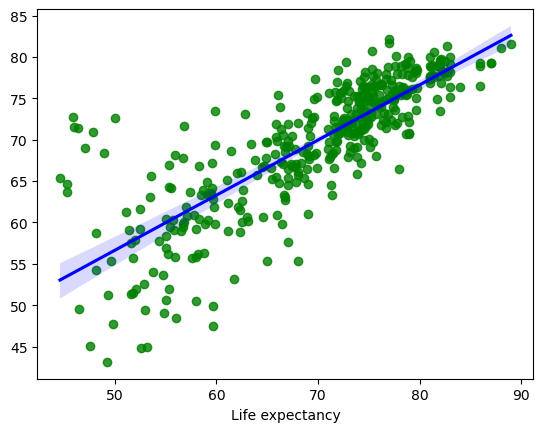

In [29]:
sns.regplot(x = Y_test, y = lr_y_pred, scatter_kws={"color": "green"}, line_kws={"color": "blue"})
plt.show() # prediction graph

In [30]:
prediction = pd.DataFrame({'Actual':Y_test , 'Prediction':lr_y_pred})

In [31]:
prediction # comparision prediction and actual data

,Actual,Prediction
602,76.7,72.183818
303,71.8,68.776451
843,78.4,76.381643
1546,69.0,71.451141
232,75.3,78.499985
...,...,...
252,69.3,71.965096
624,66.9,69.125616
1557,55.9,68.112886
995,75.7,77.245786


## Random Forest

In [32]:
rf = RandomForestRegressor(max_samples=0.75, random_state=42)

rf.fit(X_train, Y_train)

RandomForestRegressor(max_samples=0.75, random_state=42)

In [33]:
random_forest_y_pred = rf.predict(X_test)

In [34]:
random_forest_r2_error = r2_score(Y_test, random_forest_y_pred)
random_forest_mse = mean_squared_error(Y_test, random_forest_y_pred)
random_forest_y_mae = mean_absolute_error(Y_test, random_forest_y_pred)
random_forest_rmse = np.sqrt(mean_absolute_error(Y_test, random_forest_y_pred))

print('R squared : ',random_forest_r2_error)
print('Mean Squared Error: ',random_forest_mse)
print('Mean Absolute Error: ',random_forest_y_mae)
print('Root Mean Squared Error : ',random_forest_rmse)

R squared :  0.8977671159889031
Mean Squared Error:  9.406211430255626
Mean Absolute Error:  1.7045286644565463
Root Mean Squared Error :  1.3055759895373942


In [35]:
random_forest_model=RandomForestRegressor(max_samples=0.75, random_state=42)
random_forest_model.fit(X_train,Y_train)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf_ridge = GridSearchCV(
    random_forest_model, 
    param_grid, 
    cv=5, 
)

rf_ridge.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_samples=0.75, random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [36]:
best_rf_params = rf_ridge.best_params_
best_rf_params

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}

In [37]:
best_random_forest_model = RandomForestRegressor(**best_rf_params)

In [38]:
best_random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=15, n_estimators=150)

In [39]:
best_random_forest_y_pred = best_random_forest_model.predict(X_test)

best_random_forest_r2_error = r2_score(Y_test, best_random_forest_y_pred)
best_random_forest_mse = mean_squared_error(Y_test, best_random_forest_y_pred)
best_random_forest_y_mae = mean_absolute_error(Y_test, best_random_forest_y_pred)
best_random_forest_rmse = np.sqrt(mean_absolute_error(Y_test, best_random_forest_y_pred))

print('R squared : ',best_random_forest_r2_error)
print('Mean Squared Error: ',best_random_forest_mse)
print('Mean Absolute Error: ',best_random_forest_y_mae)
print('Root Mean Squared Error : ',best_random_forest_rmse)

R squared :  0.8935029487196202
Mean Squared Error:  9.79854760757112
Mean Absolute Error:  1.6741138749594244
Root Mean Squared Error :  1.2938755252957777


## Adaboost

In [40]:
adaboost_model = AdaBoostRegressor(random_state=42)

In [41]:
adaboost_model.fit(X_train, Y_train)

AdaBoostRegressor(random_state=42)

In [42]:
adaboost_y_pred = adaboost_model.predict(X_test)

In [43]:
adaboost_r2_error = r2_score(Y_test, adaboost_y_pred)
adaboost_mse = mean_squared_error(Y_test, adaboost_y_pred)
adaboost_y_mae = mean_absolute_error(Y_test, adaboost_y_pred)
adaboost_rmse = np.sqrt(mean_absolute_error(Y_test, adaboost_y_pred))

print('R squared : ',adaboost_r2_error)
print('Mean Squared Error: ',adaboost_mse)
print('Mean Absolute Error: ',adaboost_y_mae)
print('Root Mean Squared Error : ',adaboost_rmse)

R squared :  0.8196111196954832
Mean Squared Error:  16.597164055620148
Mean Absolute Error:  2.984087191968317
Root Mean Squared Error :  1.7274510678940567


## Decision Tree Regressor

In [44]:
DecisionTree_model = DecisionTreeRegressor()

In [45]:
DecisionTree_model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [46]:
DecisionTree_y_pred = DecisionTree_model.predict(X_test)

In [47]:
DecisionTree_r2_error = r2_score(Y_test, DecisionTree_y_pred)
DecisionTree_mse = mean_squared_error(Y_test, DecisionTree_y_pred)
DecisionTree_mae = mean_absolute_error(Y_test, DecisionTree_y_pred)
DecisionTree_rmse = np.sqrt(mean_absolute_error(Y_test, DecisionTree_y_pred))

print('R squared : ',DecisionTree_r2_error)
print('Mean Squared Error: ',DecisionTree_mse)
print('Mean Absolute Error: ',DecisionTree_mae)
print('Root Mean Squared Error : ',DecisionTree_rmse)

R squared :  0.840337806813851
Mean Squared Error:  14.690149466625853
Mean Absolute Error:  2.1262029363012074
Root Mean Squared Error :  1.4581505190827206


In [48]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decisiontree_grid_search = GridSearchCV(DecisionTree_model, param_grid, cv=5, scoring='neg_mean_squared_error')
decisiontree_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [49]:
best_decisiontree_model = decisiontree_grid_search.best_estimator_
best_decisiontree_model

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)

In [50]:
best_decisiontree_y_pred = y_pred_test = decisiontree_grid_search.predict(X_test)

best_decisiontree_r2_error = r2_score(Y_test, best_decisiontree_y_pred)
best_decisiontree_mse = mean_squared_error(Y_test, best_decisiontree_y_pred)
best_decisiontree_y_mae = mean_absolute_error(Y_test, best_decisiontree_y_pred)
best_decisiontree_rmse = np.sqrt(mean_absolute_error(Y_test, best_decisiontree_y_pred))

print('R squared : ',best_decisiontree_r2_error)
print('Mean Squared Error: ',best_decisiontree_mse)
print('Mean Absolute Error: ',best_decisiontree_y_mae)
print('Root Mean Squared Error : ',best_decisiontree_rmse)

R squared :  0.8640445062385669
Mean Squared Error:  12.508950831182954
Mean Absolute Error:  2.0885968980338205
Root Mean Squared Error :  1.445197875044736


## Lasso Regression

In [51]:
lasso_model = Lasso()

In [52]:
lasso_model.fit(X_train,Y_train)

Lasso()

In [53]:
lasso_y_pred = lasso_model.predict(X_test)

In [54]:
lasso_r2_error = r2_score(Y_test, lasso_y_pred)
lasso_mse = mean_squared_error(Y_test, lasso_y_pred)
lasso_mae = mean_absolute_error(Y_test, lasso_y_pred)
lasso_rmse = np.sqrt(mean_absolute_error(Y_test, lasso_y_pred))

print('R squared : ',lasso_r2_error)
print('Mean Squared Error: ',lasso_mse)
print('Mean Absolute Error: ',lasso_r2_error)
print('Root Mean Squared Error : ',lasso_r2_error)

R squared :  0.6529276976809402
Mean Squared Error:  31.933320562924923
Mean Absolute Error:  0.6529276976809402
Root Mean Squared Error :  0.6529276976809402


In [55]:
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
best_lasso_Regressor = GridSearchCV(lasso_model, hyperParameters, scoring='neg_mean_squared_error', cv=5)
best_lasso_Regressor.fit(X_train,Y_train)

/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+04, tolerance: 1.157e+01
  model = cd_fast.enet_coordinate_descent(
/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.991e+04, tolerance: 1.209e+01
  model = cd_fast.enet_coordinate_descent(
/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [56]:
best_lasso_Regressor_model = best_lasso_Regressor.best_estimator_
best_lasso_Regressor_model

Lasso(alpha=1e-15)

In [57]:
best_lasso_Regressor_y_pred = best_lasso_Regressor_model.predict(X_test)

In [58]:
best_lasso_Regressor_r2_error = r2_score(Y_test, best_lasso_Regressor_y_pred)
best_lasso_Regressor_mse = mean_squared_error(Y_test, best_lasso_Regressor_y_pred)
best_lasso_Regressor_mae = mean_absolute_error(Y_test, best_lasso_Regressor_y_pred)
best_lasso_Regressor_rmse = np.sqrt(mean_absolute_error(Y_test, best_lasso_Regressor_y_pred))

print('R squared : ',best_lasso_Regressor_r2_error)
print('Mean Squared Error: ',best_lasso_Regressor_mse)
print('Mean Absolute Error: ',best_lasso_Regressor_mae)
print('Root Mean Squared Error : ',best_lasso_Regressor_rmse)

R squared :  0.6625738162388894
Mean Squared Error:  31.04580348351303
Mean Absolute Error:  3.8826653860988274
Root Mean Squared Error :  1.9704480165938982


## Ridge Regression

In [59]:
ridge_model = Ridge()

In [60]:
ridge_model.fit(X_train, Y_train)

Ridge()

In [61]:
ridge_y_pred = ridge_model.predict(X_test)

In [62]:
ridge_r2_error = r2_score(Y_test, ridge_y_pred)
ridge_mse = mean_squared_error(Y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(Y_test, ridge_y_pred)
ridge_rmse = np.sqrt(mean_absolute_error(Y_test, ridge_y_pred))

print('R squared : ',ridge_r2_error)
print('Mean Squared Error: ',ridge_mse)
print('Mean Absolute Error: ',ridge_mae)
print('Root Mean Squared Error : ',ridge_rmse)

R squared :  0.6625714371428059
Mean Squared Error:  31.046022378646352
Mean Absolute Error:  3.882676687283095
Root Mean Squared Error :  1.9704508842605275


In [63]:
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
best_ridge_Regressor = GridSearchCV(ridge_model, hyperParameters, scoring='neg_mean_squared_error', cv=5)
best_ridge_Regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [64]:
best_ridge_Regressor_model = best_ridge_Regressor.best_estimator_
best_ridge_Regressor_model

Ridge(alpha=1e-15)

In [65]:
best_ridge_Regressor_y_pred = best_ridge_Regressor_model.predict(X_test)

In [66]:
best_ridge_Regressor_r2_error = r2_score(Y_test, best_ridge_Regressor_y_pred)
best_ridge_Regressor_mse = mean_squared_error(Y_test, best_ridge_Regressor_y_pred)
best_ridge_Regressor_mae = mean_absolute_error(Y_test, best_ridge_Regressor_y_pred)
best_ridge_Regressor_rmse = np.sqrt(mean_absolute_error(Y_test, best_ridge_Regressor_y_pred))

print('R squared : ',best_ridge_Regressor_r2_error)
print('Mean Squared Error: ',best_ridge_Regressor_mse)
print('Mean Absolute Error: ',best_ridge_Regressor_mae)
print('Root Mean Squared Error : ',best_ridge_Regressor_rmse)

R squared :  0.6625738162388901
Mean Squared Error:  31.045803483512977
Mean Absolute Error:  3.8826653860988336
Root Mean Squared Error :  1.9704480165938998


## GradientBoostingRegressor

In [67]:
GradientBoosting_model = GradientBoostingRegressor()

In [68]:
GradientBoosting_model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [69]:
GradientBoosting_y_pred = GradientBoosting_model.predict(X_test)

In [70]:
GradientBoosting_r2_error = r2_score(Y_test, GradientBoosting_y_pred)
GradientBoosting_mse = mean_squared_error(Y_test, GradientBoosting_y_pred)
GradientBoosting_mae = mean_absolute_error(Y_test, GradientBoosting_y_pred)
GradientBoosting_rmse = np.sqrt(mean_absolute_error(Y_test, GradientBoosting_y_pred))

print('R squared : ',GradientBoosting_r2_error)
print('Mean Squared Error: ',GradientBoosting_mse)
print('Mean Absolute Error: ',GradientBoosting_mae)
print('Root Mean Squared Error : ',GradientBoosting_rmse)

R squared :  0.8655855011523356
Mean Squared Error:  12.367167449915105
Mean Absolute Error:  2.0152021886300777
Root Mean Squared Error :  1.4195781727788286


In [71]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_GradientBoosting_grid_search = GridSearchCV(GradientBoosting_model, param_grid, cv=5, scoring='neg_mean_squared_error')
best_GradientBoosting_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [72]:
best_GradientBoosting_model = best_GradientBoosting_grid_search.best_estimator_
best_GradientBoosting_model

GradientBoostingRegressor(max_depth=5, min_samples_split=5)

In [73]:
best_GradientBoosting_y_pred = best_GradientBoosting_model.predict(X_test)

best_GradientBoosting_r2_error = r2_score(Y_test, best_GradientBoosting_y_pred)
best_GradientBoosting_mse = mean_squared_error(Y_test, best_GradientBoosting_y_pred)
best_GradientBoosting_y_mae = mean_absolute_error(Y_test, best_GradientBoosting_y_pred)
best_GradientBoosting_rmse = np.sqrt(mean_absolute_error(Y_test, best_GradientBoosting_y_pred))

print('R squared : ',best_GradientBoosting_r2_error)
print('Mean Squared Error: ',best_GradientBoosting_mse)
print('Mean Absolute Error: ',best_GradientBoosting_y_mae)
print('Root Mean Squared Error : ',best_GradientBoosting_rmse)

R squared :  0.8807796927828422
Mean Squared Error:  10.969184986925477
Mean Absolute Error:  1.8240328892991498
Root Mean Squared Error :  1.3505676174479935


## KNN

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

KNeighborsRegressor()

In [75]:
knn_y_pred = knn.predict(X_test_scaled)

In [76]:
knn_r2_error = r2_score(Y_test, knn_y_pred)
knn_mse = mean_squared_error(Y_test, knn_y_pred)
knn_y_mae = mean_absolute_error(Y_test, knn_y_pred)
knn_rmse = np.sqrt(mean_absolute_error(Y_test, knn_y_pred))

print('R squared : ',knn_r2_error)
print('Mean Squared Error: ',knn_mse)
print('Mean Absolute Error: ',knn_y_mae)
print('Root Mean Squared Error : ',knn_rmse)

R squared :  0.8162006135738427
Mean Squared Error:  16.910956843279838
Mean Absolute Error:  2.664966374615203
Root Mean Squared Error :  1.6324724728506765


In [77]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
best_knn_model = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)
best_knn_model.fit(X_train, Y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [78]:
best_knn_y_pred = best_knn_model.predict(X_test)

In [79]:
best_knn_r2_error = r2_score(Y_test, best_knn_y_pred)
best_knn_mse = mean_squared_error(Y_test, best_knn_y_pred)
best_knn_y_mae = mean_absolute_error(Y_test, best_knn_y_pred)
best_knn_rmse = np.sqrt(mean_absolute_error(Y_test, best_knn_y_pred))

print('R squared : ',best_knn_r2_error)
print('Mean Squared Error: ',best_knn_mse)
print('Mean Absolute Error: ',best_knn_y_mae)
print('Root Mean Squared Error : ',best_knn_rmse)

R squared :  0.6842418469941867
Mean Squared Error:  29.05217804162993
Mean Absolute Error:  3.1381853088595015
Root Mean Squared Error :  1.771492395936122


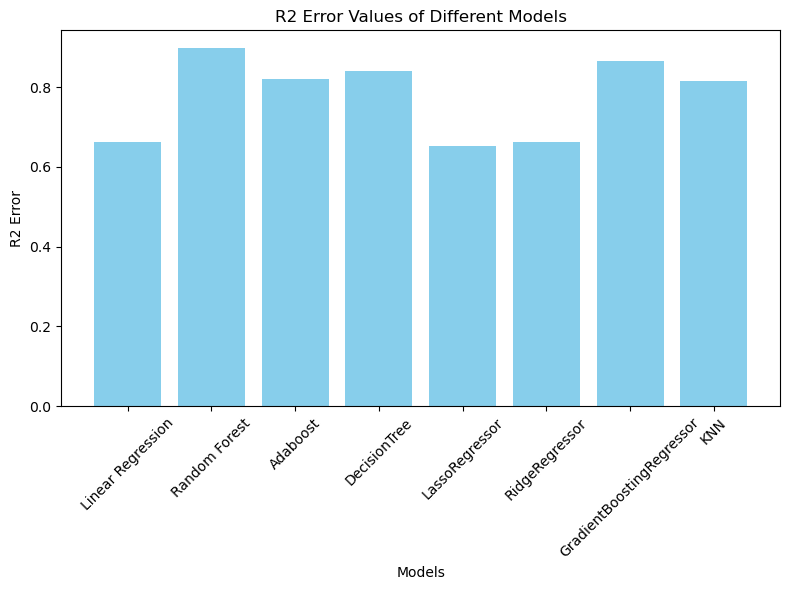

In [80]:
models = [
    'Linear Regression',
    'Random Forest',
    'Adaboost',
    'DecisionTree',
    'LassoRegressor',
    'RidgeRegressor',
    'GradientBoostingRegressor',
    'KNN'
    
]
rmse_values = [
    lr_r2_error,
    random_forest_r2_error,
    adaboost_r2_error,
    DecisionTree_r2_error,
    lasso_r2_error,
    ridge_r2_error,
    GradientBoosting_r2_error,
    knn_r2_error
]


plt.figure(figsize=(8, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R2 Error')
plt.title('R2 Error Values of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Testing Part

In [81]:
test = pd.read_csv('testing data.csv')

In [82]:
test.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Row_id
0,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,48.5,...,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4,0
1,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,58.1,...,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9,1
2,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,57.2,...,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6,2
3,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,62.9,...,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5,3
4,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,14.4,...,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4,4


In [83]:
test.shape

(882, 22)

In [84]:
test.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Row_id
count,882.000000,878.000000,882.000000,824.000000,882.000000,699.000000,882.000000,872.000000,882.000000,874.000000,814.000000,874.000000,882.000000,731.000000,6.740000e+02,872.000000,872.000000,825.000000,828.000000,882.000000
mean,2007.433107,167.364465,34.066893,4.610692,810.376165,80.466381,2707.323129,37.514564,46.801587,81.979405,5.939509,81.732265,1.721542,7957.097644,1.607585e+07,4.889106,4.869839,0.618816,11.860628,440.500000
std,4.605745,127.121232,131.989298,4.024142,2142.005343,25.425208,11127.482049,19.937217,177.039317,23.617116,2.467349,23.780048,4.821828,14883.984734,8.442597e+07,4.430891,4.508698,0.219652,3.456119,254.755765
min,2000.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,3.685949,3.600000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,2003.000000,74.000000,0.000000,0.985000,2.742669,76.000000,0.000000,19.100000,0.000000,76.000000,4.282500,76.000000,0.100000,455.737976,1.991435e+05,1.600000,1.500000,0.491000,9.900000,220.250000
50%,2007.000000,144.000000,3.000000,3.770000,59.423726,92.000000,16.500000,41.850000,4.000000,93.000000,5.795000,92.000000,0.100000,1627.428930,1.390915e+06,3.500000,3.400000,0.663000,12.200000,440.500000
75%,2011.000000,232.750000,24.000000,7.700000,462.892032,97.000000,314.000000,55.800000,32.750000,97.000000,7.430000,97.000000,0.800000,6404.199845,7.415200e+06,7.400000,7.400000,0.781000,14.200000,660.750000
max,2015.000000,715.000000,1800.000000,17.870000,19479.911610,99.000000,141258.000000,81.600000,2400.000000,99.000000,17.600000,99.000000,43.700000,119172.741800,1.293859e+09,27.500000,28.500000,0.942000,20.700000,881.000000


In [85]:
test.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Row_id'],
      dtype='object')

In [86]:
test.columns = test.columns.str.strip()
test.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Row_id'],
      dtype='object')

In [87]:
drop_columns = [
    'Status','percentage expenditure','Total expenditure',
    'GDP','Population','thinness  1-19 years','thinness 5-9 years',
    'Income composition of resources', 'Schooling','Row_id'
] # for drop the column

In [88]:
test.drop(columns=drop_columns,inplace=True)

In [89]:
test.isna().sum()

Country                0
Year                   0
Adult Mortality        4
infant deaths          0
Alcohol               58
Hepatitis B          183
Measles                0
BMI                   10
under-five deaths      0
Polio                  8
Diphtheria             8
HIV/AIDS               0
dtype: int64

In [90]:
test.drop(columns='Hepatitis B',inplace=True)

In [91]:
test.isna().sum()

Country               0
Year                  0
Adult Mortality       4
infant deaths         0
Alcohol              58
Measles               0
BMI                  10
under-five deaths     0
Polio                 8
Diphtheria            8
HIV/AIDS              0
dtype: int64

In [92]:
test['Alcohol'] = test['Alcohol'].fillna(test['Alcohol'].mean())
test['Adult Mortality'] = test['Adult Mortality'].fillna(test['Adult Mortality'].mean())
test['BMI'] = test['BMI'].fillna(test['BMI'].mean())
test['Polio'] = test['Polio'].fillna(test['Polio'].mean())
test['Diphtheria'] = test['Diphtheria'].fillna(test['Diphtheria'].mean())

In [93]:
test.isna().sum()

Country              0
Year                 0
Adult Mortality      0
infant deaths        0
Alcohol              0
Measles              0
BMI                  0
under-five deaths    0
Polio                0
Diphtheria           0
HIV/AIDS             0
dtype: int64

In [94]:
test

,Country,Year,Adult Mortality,infant deaths,Alcohol,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS
0,Syrian Arab Republic,2006,123.0,8,0.97,517,48.5,10,83.0,8.0,0.1
1,Croatia,2006,113.0,0,11.83,1,58.1,0,96.0,96.0,0.1
2,Montenegro,2007,125.0,0,4.98,0,57.2,0,92.0,92.0,0.1
3,Bahrain,2014,7.0,0,1.57,46,62.9,0,98.0,98.0,0.1
4,Kenya,2000,428.0,77,1.51,21002,14.4,121,8.0,82.0,18.1
...,...,...,...,...,...,...,...,...,...,...,...
877,Iraq,2008,167.0,32,0.17,5494,54.5,38,71.0,69.0,0.1
878,Latvia,2001,228.0,0,6.68,1,55.7,0,97.0,97.0,0.1
879,Australia,2004,69.0,1,9.84,70,6.9,1,92.0,92.0,0.1
880,Sweden,2011,58.0,0,7.40,26,57.7,0,98.0,98.0,0.1


In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

test['Country'] = le.fit_transform(test['Country'])

# Testing

In [96]:
lr_model_prediction = lr_model.predict(test)
lr_model_prediction

array([63.90637026, 77.68826579, 73.69092179, 78.43419668, 34.52206502,
       43.28978416, 65.1673991 , 69.01814768, 74.82460751, 47.24129858,
       47.79588978, 61.35855505, 65.18870527, 70.88358288, 70.61775315,
       63.68267691, 57.42490858, 77.82967702, 65.53443095, 73.42997661,
       77.12862596, 78.97463091, 72.64290247, 68.03329307, 70.04760767,
       64.9936592 , 62.92806708, 65.75828778, 73.19144232, 74.50502489,
       56.93566461, 77.87521304, 72.0938487 , 69.32158093, 78.07491489,
       53.72100028, 65.93921604, 70.19396823, 65.45675836, 75.96737467,
       52.29464693, 62.06215984, 72.63390887, 72.67315998, 75.90626727,
       54.82502245, 76.74878338, 71.37130596, 72.47028505, 68.25449708,
       45.72829338, 57.8005602 , 78.84663285, 74.09997639, 71.30668596,
       58.48799595, 73.77522424, 70.17464288, 64.13214266, 70.93544057,
       78.72639654, 46.67669618, 73.85334452, 70.95608656, 48.71685255,
       41.14821339, 55.02048528, 81.65428078, 61.98487756, 71.63

In [97]:
random_forest_model_prediction = random_forest_model.predict(test)
random_forest_model_prediction

array([72.059     , 75.874     , 74.994     , 77.275     , 52.757     ,
       50.991     , 66.903     , 73.879     , 76.782     , 54.491     ,
       51.45      , 52.863     , 57.051     , 75.382     , 69.8129561 ,
       62.654     , 58.28      , 79.535     , 70.249     , 77.863     ,
       80.286     , 86.02      , 72.844     , 71.082     , 70.87147317,
       67.878     , 54.539     , 65.48      , 82.245     , 74.223     ,
       66.578     , 76.32      , 74.937     , 71.718     , 78.912     ,
       50.842     , 57.358     , 71.21986829, 64.554     , 73.822     ,
       54.455     , 58.764     , 75.17      , 81.217     , 76.39      ,
       50.727     , 80.829     , 75.645     , 65.509     , 72.07      ,
       54.454     , 71.338     , 83.861     , 82.162     , 74.282     ,
       57.071     , 71.87964878, 75.868     , 62.583     , 71.768     ,
       78.264     , 53.306     , 74.157     , 72.781     , 52.66      ,
       55.889     , 53.522     , 75.876     , 58.402     , 72.27

In [98]:
adaboost_model_prediction = adaboost_model.predict(test)
adaboost_model_prediction

array([71.66323529, 79.98873239, 75.26571429, 73.58072289, 54.12      ,
       55.75759553, 72.94968153, 67.69798995, 74.19462366, 59.95111111,
       55.06746641, 55.65416285, 55.88619048, 75.63663968, 69.04770642,
       64.86153846, 56.91867008, 80.13706897, 64.61182796, 76.64454545,
       80.565     , 80.751     , 71.40953096, 72.11161713, 70.93296089,
       65.76666667, 58.81467098, 65.4928    , 77.68846154, 71.5204447 ,
       60.49612565, 78.93419689, 73.61125676, 70.03714286, 80.30864865,
       54.70614657, 55.05889401, 72.77619048, 65.79505882, 73.64566929,
       55.17911765, 56.40714286, 76.14574468, 78.2263022 , 75.66492027,
       54.70614657, 79.93891213, 75.66492027, 62.58808777, 69.94168798,
       58.0736377 , 70.00357143, 80.751     , 79.38396226, 74.19462366,
       54.12      , 72.30414406, 75.63663968, 60.93751119, 69.975     ,
       75.66492027, 55.88619048, 73.61125676, 73.64566929, 55.88619048,
       56.25555556, 55.05889401, 79.59570957, 57.34261036, 79.38

In [99]:
DecisionTree_model_prediction = GradientBoosting_model.predict(test)
DecisionTree_model_prediction

array([71.13021169, 76.90979642, 75.71959708, 77.23967074, 52.81803917,
       52.378402  , 68.66943346, 72.39824781, 77.27473104, 53.94444443,
       53.4131867 , 52.62883961, 54.59912911, 73.57574595, 71.68049449,
       63.24102095, 57.71570745, 79.39821304, 68.12309817, 78.11137849,
       81.02416151, 82.91463729, 72.8111614 , 70.23619195, 73.41846984,
       67.51111763, 56.68016779, 65.10237275, 82.04262822, 73.57893048,
       63.79459355, 76.56656466, 74.15471525, 70.71363354, 77.71272644,
       48.43399688, 55.01746935, 71.71834042, 64.23477566, 76.5639646 ,
       55.2096732 , 59.07799672, 75.73685425, 79.5591726 , 76.4099791 ,
       52.43518015, 81.80211919, 74.77062711, 63.21188959, 72.23596284,
       54.01075142, 67.18484662, 81.96720626, 76.55797765, 73.59614048,
       56.13006826, 71.63720303, 75.03153055, 65.68377209, 72.56076389,
       77.25317004, 53.41178191, 75.32642515, 72.83781235, 52.82009029,
       54.53342583, 53.14742883, 78.77026584, 58.41656235, 70.11

In [100]:
lasso_model_prediction = lasso_model.predict(test)
lasso_model_prediction

array([64.33425044, 77.17446544, 73.71380307, 78.70826395, 37.71307182,
       43.21830132, 65.24405241, 68.68144402, 74.53043565, 49.68406401,
       48.66217279, 60.42102166, 65.66434909, 71.1290449 , 70.59259165,
       63.39055702, 57.02077936, 77.48961944, 65.98472608, 73.80977091,
       77.03890135, 78.57773681, 72.63046981, 68.38701548, 69.20978403,
       65.16276591, 61.69158388, 65.69131077, 72.61711112, 74.24569254,
       55.89999667, 77.7369341 , 72.29061035, 69.74147918, 77.73118865,
       57.2102343 , 66.65265289, 70.92219803, 65.26263319, 76.69648337,
       53.26988651, 61.97673139, 73.21931427, 72.20506357, 75.69208157,
       57.21044701, 76.69875067, 71.56923348, 72.22490869, 68.01556345,
       45.20701179, 56.89263964, 78.56870992, 73.68233432, 71.5585164 ,
       58.50825362, 72.15717505, 70.20967052, 64.43094402, 71.02517638,
       78.75612809, 47.647265  , 74.18408432, 70.99020291, 49.10074437,
       45.48344817, 55.40824274, 81.11793314, 61.8215019 , 70.82

In [101]:
ridge_model_prediction = ridge_model.predict(test)
ridge_model_prediction

array([63.90643604, 77.68810795, 73.69091896, 78.43441326, 34.52366741,
       43.28963164, 65.16722266, 69.01797881, 74.82457725, 47.2427486 ,
       47.79627474, 61.35823556, 65.1889085 , 70.88362031, 70.61775289,
       63.68255948, 57.42459908, 77.82956457, 65.5345455 , 73.43004322,
       77.1285952 , 78.97457708, 72.64290078, 68.03328662, 70.04733241,
       64.99367487, 62.92757616, 65.75817122, 73.19127226, 74.5049977 ,
       56.93499084, 77.87519488, 72.0938657 , 69.32170528, 78.07479458,
       53.72272031, 65.93961764, 70.19411292, 65.45655071, 75.96765896,
       52.29494623, 62.06211388, 72.63406867, 72.67293028, 75.90624997,
       54.82618184, 76.74876783, 71.37134125, 72.47027285, 68.25440275,
       45.72776704, 57.79995714, 78.84660334, 74.0998165 , 71.30674072,
       58.48823202, 73.77467095, 70.17461388, 64.1320975 , 70.93549304,
       78.72645257, 46.67697112, 73.85349745, 70.95607774, 48.7168341 ,
       41.15068908, 55.02061906, 81.65421867, 61.98473654, 71.63

In [102]:
GradientBoosting_model_prediction = GradientBoosting_model.predict(test)
GradientBoosting_model_prediction

array([71.13021169, 76.90979642, 75.71959708, 77.23967074, 52.81803917,
       52.378402  , 68.66943346, 72.39824781, 77.27473104, 53.94444443,
       53.4131867 , 52.62883961, 54.59912911, 73.57574595, 71.68049449,
       63.24102095, 57.71570745, 79.39821304, 68.12309817, 78.11137849,
       81.02416151, 82.91463729, 72.8111614 , 70.23619195, 73.41846984,
       67.51111763, 56.68016779, 65.10237275, 82.04262822, 73.57893048,
       63.79459355, 76.56656466, 74.15471525, 70.71363354, 77.71272644,
       48.43399688, 55.01746935, 71.71834042, 64.23477566, 76.5639646 ,
       55.2096732 , 59.07799672, 75.73685425, 79.5591726 , 76.4099791 ,
       52.43518015, 81.80211919, 74.77062711, 63.21188959, 72.23596284,
       54.01075142, 67.18484662, 81.96720626, 76.55797765, 73.59614048,
       56.13006826, 71.63720303, 75.03153055, 65.68377209, 72.56076389,
       77.25317004, 53.41178191, 75.32642515, 72.83781235, 52.82009029,
       54.53342583, 53.14742883, 78.77026584, 58.41656235, 70.11

In [103]:
Model_Prediction = pd.DataFrame({
    'Linear Regression': lr_model_prediction,
    'Random Forest':random_forest_model_prediction,
    'Adaboost':adaboost_model_prediction,
    'DecisionTree':DecisionTree_model_prediction,
    'LassoRegressor':lasso_model_prediction,
    'RidgeRegressor':ridge_model_prediction,
    'GradientBoostingRegressor':GradientBoosting_model_prediction
})

In [104]:
Model_Prediction # all model predictions

,Linear Regression,Random Forest,Adaboost,DecisionTree,LassoRegressor,RidgeRegressor,GradientBoostingRegressor
0,63.906370,72.059,71.663235,71.130212,64.334250,63.906436,71.130212
1,77.688266,75.874,79.988732,76.909796,77.174465,77.688108,76.909796
2,73.690922,74.994,75.265714,75.719597,73.713803,73.690919,75.719597
3,78.434197,77.275,73.580723,77.239671,78.708264,78.434413,77.239671
4,34.522065,52.757,54.120000,52.818039,37.713072,34.523667,52.818039
...,...,...,...,...,...,...,...
877,66.652055,70.489,71.520445,72.025899,66.722813,66.652006,72.025899
878,71.261991,70.669,71.520445,69.377030,71.211490,71.261877,69.377030
879,72.840209,81.276,78.226302,79.559173,72.340710,72.839980,79.559173
880,78.180610,83.038,80.308649,82.511541,77.997134,78.180623,82.511541
